In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [127]:
#load the iris dataset
iris = load_iris()

In [128]:
# Convert the dataset into dataframe
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['target'] = iris.target

In [129]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [130]:
df.target = df.target.map({0:'setosa',1:'versicolor',2:'virginica'})

In [131]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
76,6.8,2.8,4.8,1.4,versicolor
138,6.0,3.0,4.8,1.8,virginica
37,4.9,3.6,1.4,0.1,setosa
60,5.0,2.0,3.5,1.0,versicolor
149,5.9,3.0,5.1,1.8,virginica


<Figure size 1000x1000 with 0 Axes>

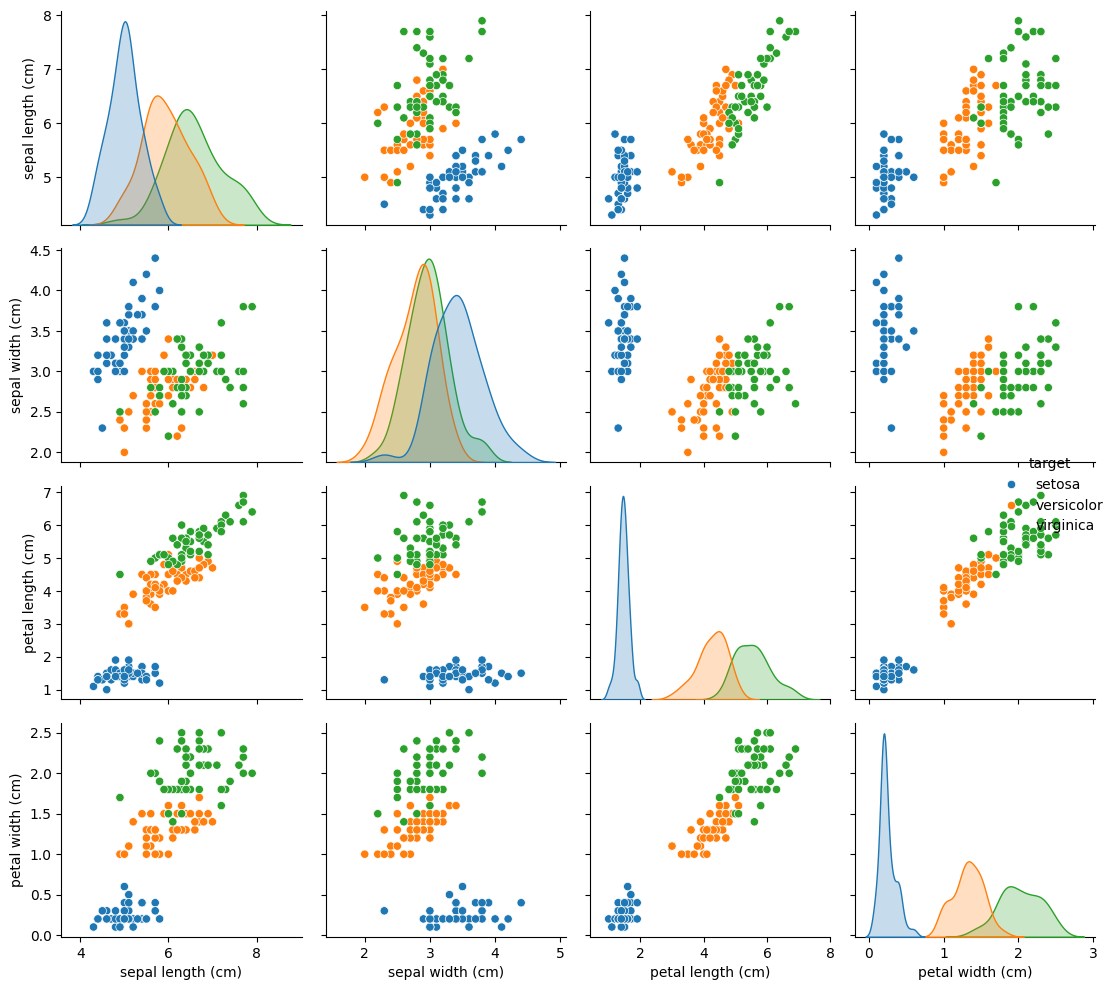

In [132]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='target')
plt.tight_layout()
plt.show()

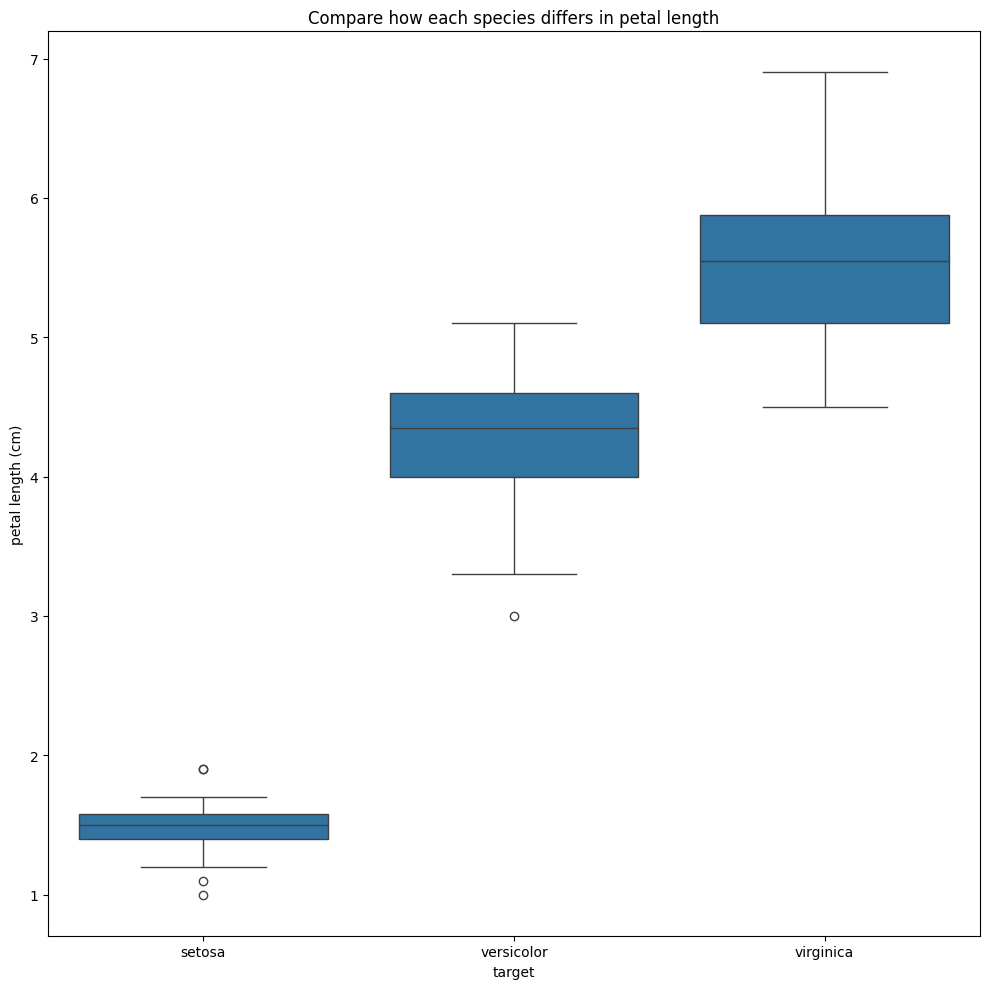

In [133]:
#Compare how each species differs in petal/sepal size
plt.figure(figsize=(10,10))
sns.boxplot(x='target',y='petal length (cm)',data=df)
plt.title('Compare how each species differs in petal length')
plt.tight_layout()
plt.show()

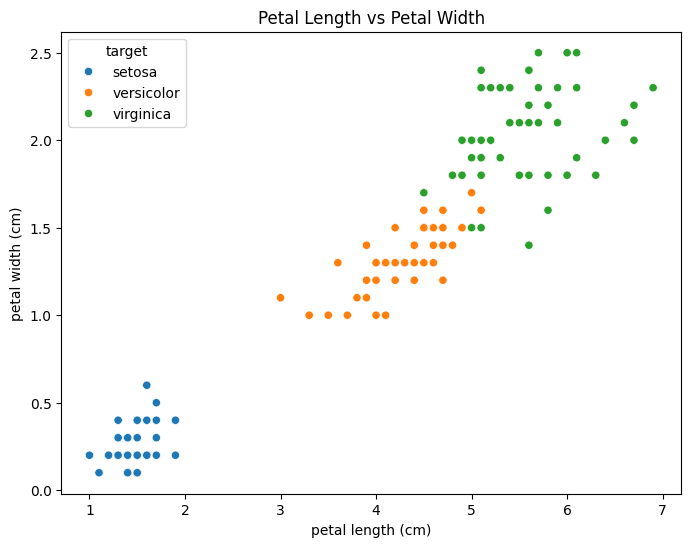

In [134]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=df)
plt.title("Petal Length vs Petal Width")
plt.show()


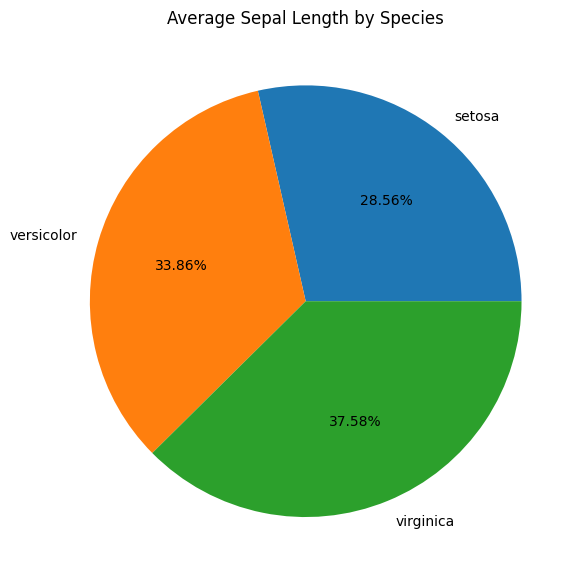

In [135]:
df.groupby('target')['sepal length (cm)'].mean().plot.pie(figsize=(6,6), autopct = '%.2f%%')
plt.title('Average Sepal Length by Species')
plt.ylabel('')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [136]:
X = df.drop('target',axis=1)
y = df['target']

In [137]:
ohe = OneHotEncoder(sparse_output=False)  # ensure dense output
y_encoded = ohe.fit_transform(y.values.reshape(-1,1))  # only once

print('Original y:', y[:5].tolist())
print('One-hot encoded y:\n', y_encoded[:5])

# y_encoded is already a dense NumPy array
y_onehot = y_encoded.astype(float)

Original y: ['setosa', 'setosa', 'setosa', 'setosa', 'setosa']
One-hot encoded y:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [138]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [139]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Softmax activation
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis = 1, keepdims= True))
  return exp_z/ np.sum(exp_z, axis = 1, keepdims= True)

In [141]:
# Cross-entropy loss
def cross_entropy(y_true, y_pred):
  return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis = 1))

In [142]:
from types import new_class
def train_perceptron(X, y, epochs = 500, lr = 0.01):
  np.random.seed(42)
  n_samples, n_features = X.shape
  n_classes = y.shape[1]
  losses = []

  W = np.random.randn(n_features, n_classes)
  b = np.zeros((1, n_classes))

  for epoch in range(epochs):
    # Forward pass
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)

    #Loss

    loss = cross_entropy(y, y_pred)
    losses.append(loss)

    # gradients

    grad_W = (1/n_samples) * np.dot(X.T, (y_pred- y))
    grad_b = (1/n_samples) * np.sum(y_pred - y, axis = 0, keepdims= True)

    #update

    W -= lr * grad_W
    b -= lr * grad_b

    if epoch % 50 == 0:
      print(f"Epoch {epoch}, Loss: {loss}")

  return W, b, losses

In [143]:
# Prediction Function
def predict(X, W, b):
  logits = np.dot(X, W) + b
  y_pred = softmax(logits)
  return np.argmax(y_pred, axis = 1)

In [145]:
# Train the model
W, b, losses = train_perceptron(X_train_scaled, y_train, epochs= 500, lr = 0.05)

Epoch 0, Loss: 2.3245125954184487
Epoch 50, Loss: 0.5757172617297924
Epoch 100, Loss: 0.4508718639260117
Epoch 150, Loss: 0.40001160432941657
Epoch 200, Loss: 0.36651772731099025
Epoch 250, Loss: 0.3408328904058712
Epoch 300, Loss: 0.3198013228693334
Epoch 350, Loss: 0.30198213913914035
Epoch 400, Loss: 0.2865711183913264
Epoch 450, Loss: 0.2730558139475797


In [146]:
# Evaluate on test set
y_pred_test = predict(X_test_scaled, W, b)
y_true = np.argmax(y_test, axis = 1)
accuracy = np.mean(y_pred_test == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.67%


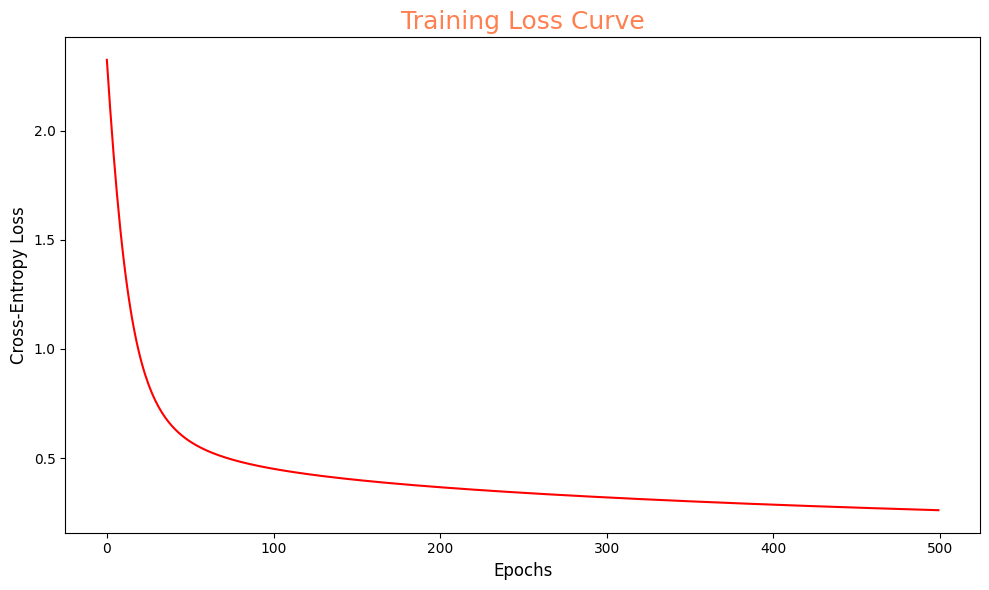

In [159]:
plt.figure(figsize=(10,6))
plt.plot(losses, color ='r')
plt.xlabel("Epochs", size = 12)
plt.ylabel("Cross-Entropy Loss", size = 12)
plt.title("Training Loss Curve", size = 18, color = 'coral')
plt.tight_layout()
plt.show()
